

**Importing libraries**



In [29]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

**Importing the Dataset**

In [7]:
data = pd.read_csv('iris.csv',parse_dates=True) 
data.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
63,6.1,2.9,4.7,1.4,Versicolor
138,6.0,3.0,4.8,1.8,Virginica
71,6.1,2.8,4.0,1.3,Versicolor
127,6.1,3.0,4.9,1.8,Virginica
17,5.1,3.5,1.4,0.3,Setosa


**Data processing**

In [8]:
data.isna().sum() #Checking for missing values

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.variety.value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

In [11]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For better performance of our model we need to keep numerical values between 0 and 1

In [12]:
data.max() #displays the max of every column

sepal.length          7.9
sepal.width           4.4
petal.length          6.9
petal.width           2.5
variety         Virginica
dtype: object

In [13]:
data['sepal.length'] = data['sepal.length']/7.9
data['sepal.width'] = data['sepal.width']/4.4
data['petal.length'] = data['petal.length']/6.9
data['petal.width'] = data['petal.width']/2.5


In [14]:
data.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
130,0.936709,0.636364,0.884058,0.76,Virginica
109,0.911392,0.818182,0.884058,1.00,Virginica
126,0.784810,0.636364,0.695652,0.72,Virginica
75,0.835443,0.681818,0.637681,0.56,Versicolor
10,0.683544,0.840909,0.217391,0.08,Setosa


**Model creation**



In [15]:
data = data.values
X = data[:,0:4].astype(float)
Y = data[:,4]

In [16]:
X

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

In [17]:
Y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [18]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables 
dummy_y = np_utils.to_categorical(encoded_Y)

In [19]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [21]:
hist = baseline_model().fit(X, dummy_y, batch_size=5, epochs=200, verbose=2)
                 

Epoch 1/200
30/30 - 0s - loss: 1.1315 - accuracy: 0.3333
Epoch 2/200
30/30 - 0s - loss: 1.1170 - accuracy: 0.3333
Epoch 3/200
30/30 - 0s - loss: 1.1031 - accuracy: 0.3333
Epoch 4/200
30/30 - 0s - loss: 1.0857 - accuracy: 0.4467
Epoch 5/200
30/30 - 0s - loss: 1.0676 - accuracy: 0.4467
Epoch 6/200
30/30 - 0s - loss: 1.0494 - accuracy: 0.5467
Epoch 7/200
30/30 - 0s - loss: 1.0294 - accuracy: 0.6000
Epoch 8/200
30/30 - 0s - loss: 1.0094 - accuracy: 0.6333
Epoch 9/200
30/30 - 0s - loss: 0.9887 - accuracy: 0.6467
Epoch 10/200
30/30 - 0s - loss: 0.9667 - accuracy: 0.6533
Epoch 11/200
30/30 - 0s - loss: 0.9437 - accuracy: 0.6533
Epoch 12/200
30/30 - 0s - loss: 0.9199 - accuracy: 0.6800
Epoch 13/200
30/30 - 0s - loss: 0.8952 - accuracy: 0.8533
Epoch 14/200
30/30 - 0s - loss: 0.8706 - accuracy: 0.8733
Epoch 15/200
30/30 - 0s - loss: 0.8453 - accuracy: 0.8133
Epoch 16/200
30/30 - 0s - loss: 0.8200 - accuracy: 0.8667
Epoch 17/200
30/30 - 0s - loss: 0.7952 - accuracy: 0.8400
Epoch 18/200
30/30 - 0s

In [24]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [25]:
kfold = KFold(n_splits=10, shuffle=True)

In [26]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (4.47%)


In [27]:
losses = hist.history['loss']
epochs = hist.epoch

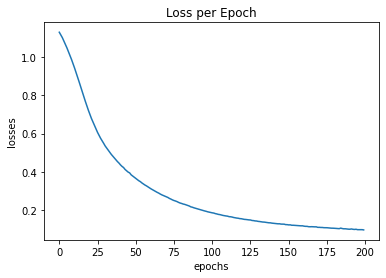

In [30]:
plt.plot(epochs, losses)
plt.xlabel("epochs")
plt.ylabel('losses')
plt.title('Loss per Epoch')
plt.show()

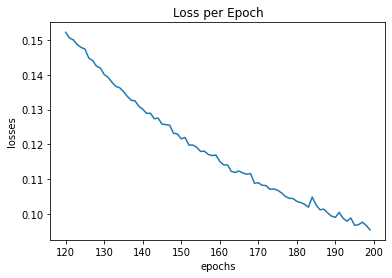

In [41]:
plt.plot(epochs[120:], losses[120:])
plt.xlabel("epochs")
plt.ylabel('losses')
plt.title('Loss per Epoch')
plt.show()